This file contains all the code for simulating the continious chemical langevin version of the model. It also generates a figure corresponding to that in the article.

# Preparations

### Fetch Packages and Files

In [1]:
# Fetch the required julia packages (packages can be added by "> using Pkg, Pkg.add("PackageName")").
using DiffEqBase
using DiffEqJump
using StochasticDiffEq
using Plots
using Plots.Measures
using Serialization
using Statistics
gr(); default(fmt = :png);

In [2]:
# Loads the files with the required functions for this project.
include("Functions/sigV_model.jl")     # This file declares the model.
include("Functions/simulate.jl")       # This fule contains the functions for simulating the model.
include("Functions/make_plots.jl");    # This file contains the function for creating the plots.
include("Functions/make_csvs.jl");     # This file contains the function for re-saving simulations as csv files (if one wishes to access them from other programming langauges).

### Sets File Destination

In [3]:
# Sets folder where the simulations are saved.
data_folder = "../Data/";

In [4]:
# Sets folder where the figures are saved.
figure_folder = "../Figures/";

### Set Parameters

# Investigation

In [5]:
v0 = 0.025; v = 2.0; K = 50.0; n = 2;
kD = 5.0; kB = 100.0; kC = 0.025;
deg = 0.01; L = 0.; η =1.;            # η lineary scales the degree of noise in the CLE. Here this is set to 1 (no scaling).
p = [v0,v,K,n,kD,kB,kC,deg,L,η];

In [8]:
# Makes the two standard simulations (heterogeneous activation and memory) for the continious (CLE based) version of the model.
@time sols_heterogeneous_activation = cle_monte(p,(-500.,3500.),100,((0.,1.),))
@time sols_memory = cle_monte(p,(-500.,3500.),100,((0.,1.),(2000.,-1.),(2350.,1.)));

584.522978 seconds (401.43 M allocations: 6.091 GiB, 0.17% gc time)
602.259342 seconds (401.44 M allocations: 6.091 GiB, 0.15% gc time)


In [12]:
# Saves the simulations to file.
serialize(data_folder*"chemical_langevin/sols_heterogeneous_activation.jls",sols_heterogeneous_activation)
serialize(data_folder*"chemical_langevin/sols_memory.jls",sols_memory)

In [13]:
# If one wishes to load previously simulated (and saved) simulations to use for the plotting, run this.
sols_heterogeneous_activation = deserialize(data_folder*"chemical_langevin/sols_heterogeneous_activation.jls")
sols_memory = deserialize(data_folder*"chemical_langevin/sols_memory.jls");

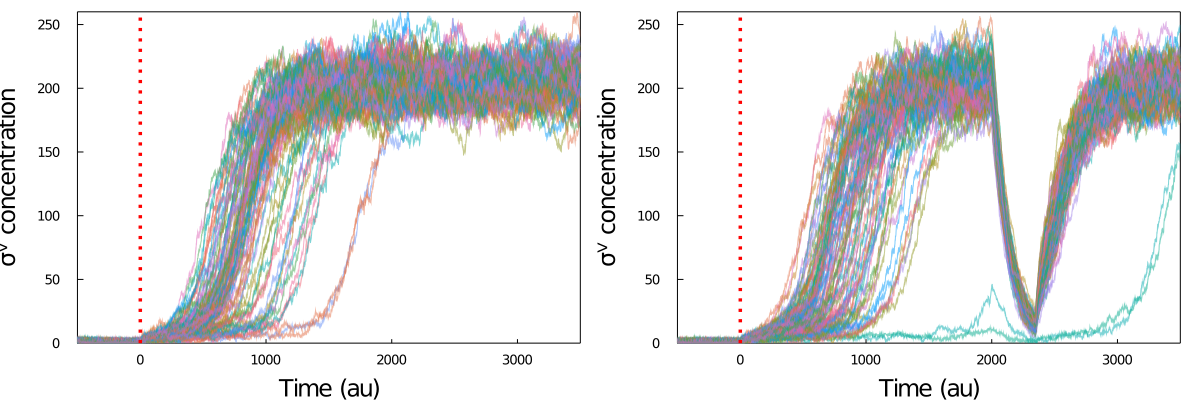

In [9]:
# Makes the plot.
plot(sols_heterogeneous_activation,vars=[1],linewidth=1.,linealpha=0.5,framestyle=:box,grid=false,xguide="Time (au)",yguide="σⱽ concentration",guidefontsize=16,tickfontsize=9,right_margin=3mm,title="",titlefontsize=20); plot_heterogeneous_activation = plot_stress_pattern!([0],[],260);
plot(sols_memory,vars=[1],linewidth=1.,linealpha=0.5,framestyle=:box,grid=false,xguide="Time (au)",yguide="σⱽ concentration",guidefontsize=16,tickfontsize=9,right_margin=3mm,title="",titlefontsize=20); plot_memory = plot_stress_pattern!([0],[],260);
plot(plot_heterogeneous_activation,plot_memory,size=(1200,400),bottom_margin=6mm,left_margin=5mm,ylimit=(0.,260.))

In [15]:
# Saves the plot.
savefig(figure_folder*"chemical_langevin/standard_figures.png")
savefig(figure_folder*"chemical_langevin/standard_figures.svg")

# Save Simulats as CSV

Since csv files can be more commonly read outside of the julia programming language, this section simply loads the simulation files, and re-saves them as csv files. The script only saves the value of the SigV variable, but this can be changed to either saving the RsiV or the SigV-RsiV variable. The csv saving function loads the target julia file from the data folder, and then resave it as csv (does not need to be in memory).

The csv files are structured as follow. Each csv file corresponds to one monte-carlo simulation from a model (all simulations drawn from the same distribution). The first line contains all of the time points. Then follows one line for each simulation (typically 100). The line contains comma-separated values with the amount of the component at that time point (the component is determined by which components are saved using the "vars" option, files have an appended "_SigV",  "_RsiV", or "_SigVRsiV", denoting which component int contains. 

In [16]:
# Selects which variable we wishes to save (and how we wish to change the file name correspondingly).
vars = [1];    # Selects for which variable we wishes to create csv files. 1 corresponds to SigV, 2 to RsiV, and 3 to SigV-RsiV. The vector can have several (e.g. for "vars = [1,2]" we would create files for both SigV and RsiV).

In [17]:
resave_as_cvs(data_folder*"chemical_langevin/","sols_heterogeneous_activation",vars=vars)
resave_as_cvs(data_folder*"chemical_langevin/","sols_memory",vars=vars)